# SDAV Portfolio Worksheet 3 (2020)
***

The completion of this worksheet is worth ***25%*** towards your final mark for the Security Data Analytics and Visualisation (SDAV) module.

### Task
***

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>


### Assessment and Marking
***

For this assignment, you will be given a grade out of possible 25 marks.

- Up to 10 marks for excellent analytical processes used to manipulate and examine the data to carry out the investigation with good demonstration of creative thinking and for identifying all suspicious activity of the malicious insider.
- Up to 10 marks for excellent visualisation techniques adopted for examining the data, using a range of appropriate visualisation techniques and with clear justification of how this informs the narrative.
- Up to 5 marks for clarity and professional presentation of your work.

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

### Submission
***

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you can use this notebook file as a template for your submission. You should include both your ipynb file, and a PDF/HTML export as part of your final portfolio submission. 


## Load in the data

Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. Please also ensure you have saved your dataset to a folder of the same name.

In [2]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'IOTINC'

### Function for loading data - do not change

In [3]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

def load_data(DATASET):
    if DATASET in ['MEGACORP', 'VERINET', 'APPLESOFT', 'IOTINC']:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)
employee_data

,email,pc,role,user
0,usr-hjd@iotinc.com,pc0,Security,usr-hjd
1,usr-pec@iotinc.com,pc1,Finance,usr-pec
2,usr-mrj@iotinc.com,pc2,Security,usr-mrj
3,usr-ybh@iotinc.com,pc3,Director,usr-ybh
4,usr-liy@iotinc.com,pc4,HR,usr-liy
...,...,...,...,...
95,usr-vtc@iotinc.com,pc95,Finance,usr-vtc
96,usr-ufk@iotinc.com,pc96,Legal,usr-ufk
97,usr-kfj@iotinc.com,pc97,Services,usr-kfj
98,usr-taq@iotinc.com,pc98,Services,usr-taq


## Start your Investigation

In [4]:
### The following code samples may be useful to aid your investigation

In [5]:
### Create a hirarchy dictionary that specifies, all users within each role / all user e-mails within each role
user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)
user_set_emails

{'Security': ['usr-hjd@iotinc.com',
  'usr-mrj@iotinc.com',
  'usr-hji@iotinc.com',
  'usr-mte@iotinc.com',
  'usr-idm@iotinc.com',
  'usr-ajl@iotinc.com',
  'usr-nnw@iotinc.com',
  'usr-pnd@iotinc.com',
  'usr-dpz@iotinc.com',
  'usr-lgs@iotinc.com',
  'usr-czl@iotinc.com'],
 'Finance': ['usr-pec@iotinc.com',
  'usr-uxl@iotinc.com',
  'usr-crj@iotinc.com',
  'usr-goj@iotinc.com',
  'usr-gng@iotinc.com',
  'usr-vet@iotinc.com',
  'usr-iek@iotinc.com',
  'usr-agf@iotinc.com',
  'usr-qoa@iotinc.com',
  'usr-ity@iotinc.com',
  'usr-pmd@iotinc.com',
  'usr-auj@iotinc.com',
  'usr-vtc@iotinc.com'],
 'Director': ['usr-ybh@iotinc.com',
  'usr-hfh@iotinc.com',
  'usr-tjn@iotinc.com',
  'usr-bcb@iotinc.com',
  'usr-alb@iotinc.com',
  'usr-jsd@iotinc.com',
  'usr-nug@iotinc.com',
  'usr-hon@iotinc.com',
  'usr-wxb@iotinc.com',
  'usr-wuo@iotinc.com',
  'usr-zmh@iotinc.com',
  'usr-ryz@iotinc.com',
  'usr-wtd@iotinc.com',
  'usr-tzl@iotinc.com',
  'usr-pqc@iotinc.com'],
 'HR': ['usr-liy@iotinc.co

In [6]:
### Filter the data by all users that are in a given role
file_data[ file_data['user'].isin(user_set[role]) ].head(10)

,datetime,filename,user
650,2018-01-01 09:15:08.660817,/docs/ip,usr-gfv
688,2018-01-01 09:25:58.766257,/docs/ip,usr-cug
747,2018-01-01 09:39:35.856447,/docs,usr-fua
767,2018-01-01 09:43:27.091841,/docs/clients,usr-ufk
787,2018-01-01 09:46:49.477766,/docs/clients,usr-abl
797,2018-01-01 09:49:17.330217,/docs/clients,usr-ira
798,2018-01-01 09:49:24.958191,/docs,usr-fua
807,2018-01-01 09:50:59.177374,/docs/ip,usr-ufk
836,2018-01-01 09:56:54.956555,/docs/ip,usr-abl
855,2018-01-01 10:00:25.797018,/docs/clients,usr-nqg


In [7]:
### Get the day of the year for a given datetime column
day = pd.DataFrame(email_data['datetime'].dt.dayofyear)

In [8]:
login_data.head(10)

,action,datetime,pc,user
0,login,2018-01-01 00:00:23,pc41,usr-nug
1,login,2018-01-01 00:19:19,pc84,usr-pqc
2,login,2018-01-01 00:52:09,pc15,usr-hji
3,login,2018-01-01 01:10:11,pc0,usr-hjd
4,login,2018-01-01 01:31:37,pc42,usr-hon
5,login,2018-01-01 01:38:00,pc2,usr-mrj
6,login,2018-01-01 02:18:29,pc64,usr-zmh
7,login,2018-01-01 02:38:36,pc33,usr-alb
8,login,2018-01-01 02:43:24,pc83,usr-dpz
9,login,2018-01-01 02:49:32,pc35,usr-jsd


In [9]:
usb_data.head(10)

,action,datetime,pc,user
0,usb_insert,2018-01-01 04:36:13.483448,pc98,usr-taq
1,usb_remove,2018-01-01 05:07:25.065800,pc98,usr-taq
2,usb_insert,2018-01-01 05:15:49.504179,pc98,usr-taq
3,usb_insert,2018-01-01 05:22:30.567537,pc7,usr-igf
4,usb_remove,2018-01-01 05:30:34.971914,pc7,usr-igf
5,usb_insert,2018-01-01 05:32:05.053349,pc49,usr-muu
6,usb_remove,2018-01-01 05:33:16.962521,pc49,usr-muu
7,usb_insert,2018-01-01 05:40:45.317218,pc53,usr-pzu
8,usb_remove,2018-01-01 05:43:47.920975,pc98,usr-taq
9,usb_insert,2018-01-01 05:47:30.179472,pc28,usr-akj


In [10]:
web_data.head(10)

,datetime,user,website
0,2018-01-01 01:15:18.310617,usr-nug,http://www.bbc.co.uk
1,2018-01-01 02:12:59.599834,usr-hji,http://www.mysecurityguard.net
2,2018-01-01 02:47:01.078121,usr-dpz,http://www.mysecurityguard.net
3,2018-01-01 02:59:24.746281,usr-jsd,http://www.ebay.co.uk
4,2018-01-01 03:20:17.045334,usr-zmh,http://www.ebay.co.uk
5,2018-01-01 03:35:53.715842,usr-nug,http://www.twitter.com
6,2018-01-01 03:36:35.045510,usr-lgs,http://www.google.com
7,2018-01-01 04:16:21.807159,usr-pqc,http://www.bbc.co.uk
8,2018-01-01 04:16:33.063744,usr-nug,http://www.ebay.co.uk
9,2018-01-01 04:32:56.171551,usr-pzu,http://www.twitter.com


In [11]:
file_data.head(10)

,datetime,filename,user
0,2018-01-01 00:10:45.945801,/private/staffreview,usr-nug
1,2018-01-01 00:45:14.571463,/private/staffreview,usr-pqc
2,2018-01-01 00:51:22.376542,/private/staffreview,usr-pqc
3,2018-01-01 00:53:01.916992,/private,usr-pqc
4,2018-01-01 01:05:44.265768,/docs/employment,usr-pqc
5,2018-01-01 01:12:08.669737,/private/staffreview,usr-pqc
6,2018-01-01 01:24:51.421356,/docs/employment,usr-pqc
7,2018-01-01 02:00:10.921376,/docs,usr-hon
8,2018-01-01 02:27:09.919494,/private,usr-zmh
9,2018-01-01 02:34:37.418774,/private,usr-hon


In [12]:
#Gropu by web user to determine the number of web activities per user
num_activities = pd.DataFrame(web_data.groupby('user')['user'].count())
num_activities.columns = ['Count']
num_activities = num_activities.sort_values('Count', ascending = False)
num_activities = num_activities.reset_index()
#Top 10 users with the most web activities
num_activities.head(10)

,user,Count
0,usr-igf,13229
1,usr-dkf,12963
2,usr-sfk,12911
3,usr-akj,12884
4,usr-lzz,12788
5,usr-cro,12788
6,usr-tkv,12772
7,usr-ozs,12719
8,usr-yqg,12653
9,usr-eyu,12570


> Examine the number of emails sent per day

In [13]:
emails_per_day = pd.DataFrame(day.groupby('datetime')['datetime'].count())
emails_per_day.columns = ['Count']
emails_per_day = emails_per_day.reset_index().sort_values('Count', ascending = False)
emails_per_day.head(10)

,datetime,Count
85,86,4000
10,11,3979
45,46,3973
117,118,3971
93,94,3958
146,147,3949
145,146,3947
50,51,3942
65,66,3936
172,173,3926


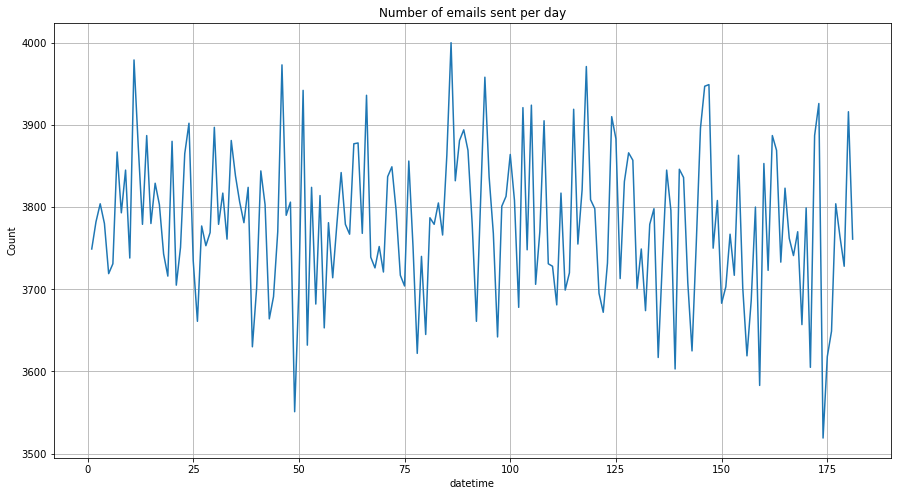

In [14]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(data=emails_per_day, x="datetime", y="Count")
plt.grid()
plt.title('Number of emails sent per day')
plt.show()

> We note from the plot above that the most number of emails were sent on the 87th day of the year.

> In the following plot, we will examine the employees who sent the most number of emails.

In [15]:
sent_mails = pd.DataFrame(email_data.groupby('sender')['sender'].count())
sent_mails.columns = ['Count']
sent_mails = sent_mails.reset_index().sort_values('Count', ascending = False)
#Top 10 email senders
sent_mails.head(10)

,sender,Count
78,usr-tkv@iotinc.com,17586
79,usr-tlv@iotinc.com,17378
69,usr-psh@iotinc.com,17360
28,usr-gyh@iotinc.com,17347
80,usr-tvc@iotinc.com,17207
70,usr-pzu@iotinc.com,17175
64,usr-ozs@iotinc.com,17127
51,usr-lzz@iotinc.com,17123
9,usr-bdq@iotinc.com,17110
21,usr-eyu@iotinc.com,17076


> Let us examine the number of web activities per user

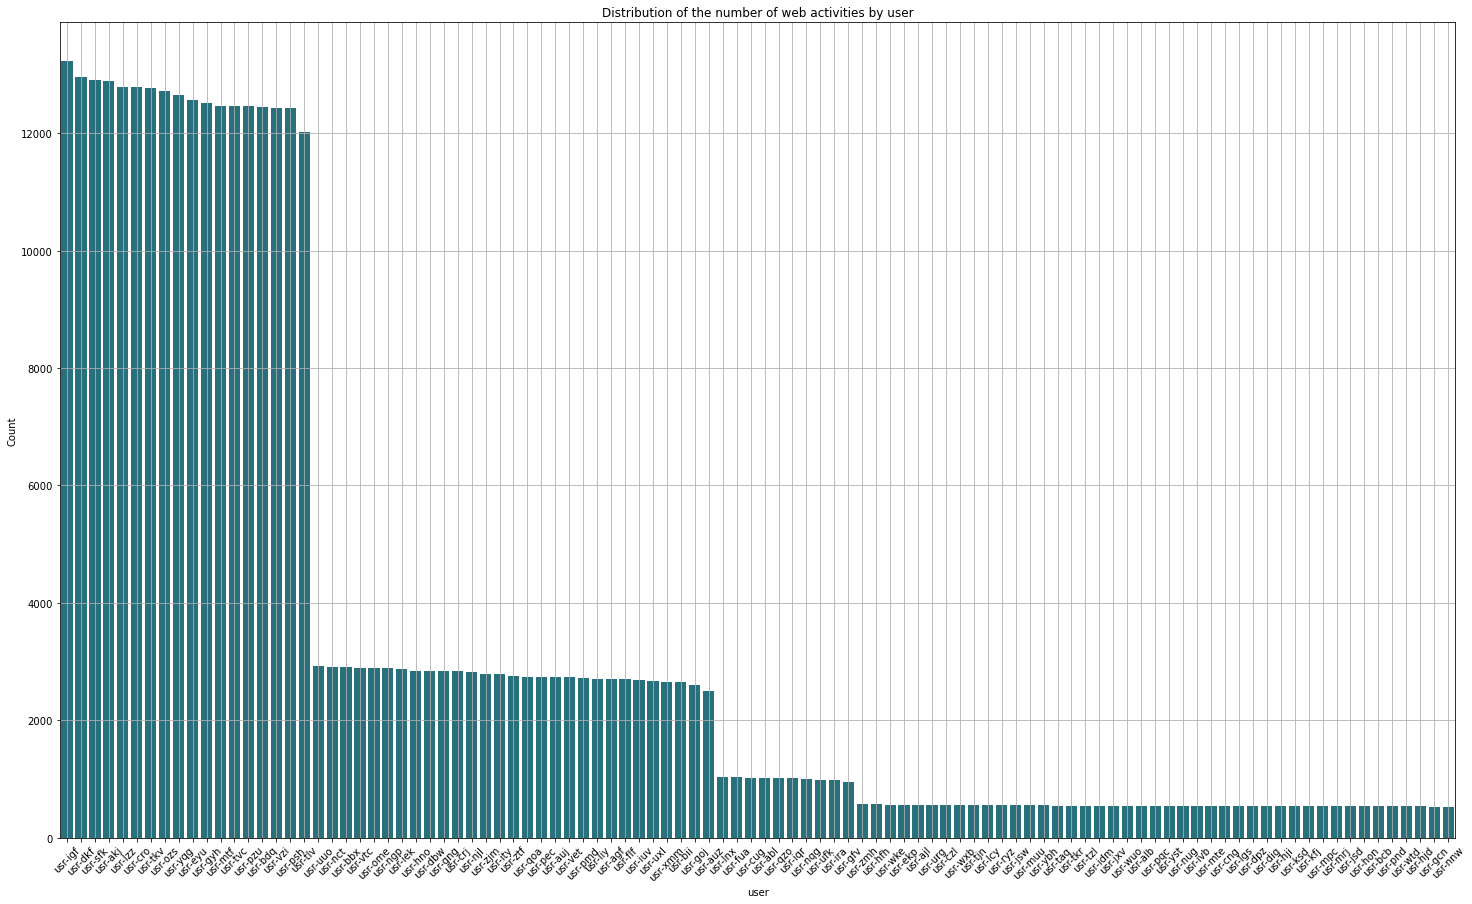

In [16]:
fig = plt.figure(figsize=(25,15))
sns.barplot(x='user', 
            y="Count", 
            data=num_activities, color = '#1A7A89')
plt.title('Distribution of the number of web activities by user')
plt.xticks(rotation=45)
plt.grid()
plt.show()

> From the preceding tbale, we observe that users pdv, oja, qpa, pda, and jcc have the highest number of web usage while sof, czr, rhc, bxf, and rhm have the least web activities.

In [17]:
file_names = pd.DataFrame(file_data.groupby(['user', 'filename'])['filename'].count())
file_names.columns = ['Number of activities']
#Select users who accessed security files
file_names = file_names.filter(like='/security/ids', axis=0).reset_index()
file_names.head(10)

,user,filename,Number of activities
0,usr-akj,/security/ids,2101
1,usr-bdq,/security/ids,2171
2,usr-cro,/security/ids,2058
3,usr-dkf,/security/ids,2167
4,usr-eyu,/security/ids,2140
5,usr-gyh,/security/ids,2077
6,usr-igf,/security/ids,2175
7,usr-lzz,/security/ids,2163
8,usr-mtf,/security/ids,2156
9,usr-ozs,/security/ids,2080


In [18]:
# initializing roles
filt_role = ['Security', 'Director']
  
res = list(map(user_set.get, filt_role))
#Users that can access security files
auth_list = [item for sublist in res for item in sublist]
#Filter the users who have the authority to access security files
c1 = file_names[(file_names['user'].isin(auth_list))]

In [19]:
#Asign labels to users i.e. cleared if they are in either Security or Director groups
file_names['Label'] = np.where(file_names['user'].isin(auth_list), 'Cleared', 'Suspicious')

> Hypothetically, a user who is not in the security or Director group is flagged as suspicious if they accessed security files including or Security IDs. We assume that no one should be able to access the security IDs since they are supposed to be in hashed format.

In [20]:
#Group suspecious users by the total access to security files
num_access = file_names[file_names['Label'] == 'Suspicious']
num_access = pd.DataFrame(num_access.groupby('user')['Number of activities'].sum())
num_access = num_access.reset_index().sort_values('Number of activities', ascending = False)
num_access

,user,Number of activities
13,usr-tkv,2191
6,usr-igf,2175
1,usr-bdq,2171
3,usr-dkf,2167
7,usr-lzz,2163
8,usr-mtf,2156
4,usr-eyu,2140
10,usr-psh,2136
12,usr-sfk,2135
17,usr-yqg,2134


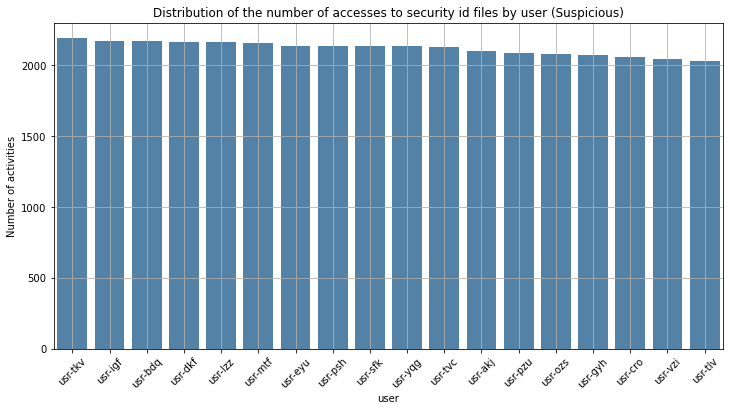

In [21]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=num_access, color = 'steelblue')
plt.title('Distribution of the number of accesses to security id files by user (Suspicious)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [22]:
all_roles

array(['Security', 'Finance', 'Director', 'HR', 'Services', 'Technical',
       'Legal'], dtype=object)

In [23]:
file_data.filename.unique()

array(['/private/staffreview', '/private', '/docs/employment', '/docs',
       '/security', '/security/physical', '/system/site',
       '/system/source', '/system', '/dev', '/security/ids',
       '/docs/clients', '/docs/ip'], dtype=object)

In [24]:
file_names = pd.DataFrame(file_data.groupby(['user', 'filename'])['filename'].count())
file_names.columns = ['Number of activities']
#Select users who accessed system files
file_names = file_names.filter(like = '/system', axis=0).reset_index()
file_names.head(10)

,user,filename,Number of activities
0,usr-akj,/system,2110
1,usr-akj,/system/source,2100
2,usr-bdq,/system,2112
3,usr-bdq,/system/source,2134
4,usr-cng,/system,699
5,usr-cng,/system/site,696
6,usr-cro,/system,2112
7,usr-cro,/system/source,2195
8,usr-dig,/system,722
9,usr-dig,/system/site,704


In [25]:
all_roles

array(['Security', 'Finance', 'Director', 'HR', 'Services', 'Technical',
       'Legal'], dtype=object)

In [26]:
# initializing roles
filt_role = ['Director', 'Technical', 'Security']
  
res = list(map(user_set.get, filt_role))
#Users that can access system files
auth_list = [item for sublist in res for item in sublist]
#Filter the users who have the authority to access provate staff review files
c1 = file_names[(file_names['user'].isin(auth_list))]

In [27]:
#Asign labels to users i.e. cleared if they are in either 'Director', 'Technical', or 'Security'
file_names['Label'] = np.where(file_names['user'].isin(auth_list), 'Cleared', 'Suspicious')
file_names.head(10)

,user,filename,Number of activities,Label
0,usr-akj,/system,2110,Cleared
1,usr-akj,/system/source,2100,Cleared
2,usr-bdq,/system,2112,Cleared
3,usr-bdq,/system/source,2134,Cleared
4,usr-cng,/system,699,Suspicious
5,usr-cng,/system/site,696,Suspicious
6,usr-cro,/system,2112,Cleared
7,usr-cro,/system/source,2195,Cleared
8,usr-dig,/system,722,Suspicious
9,usr-dig,/system/site,704,Suspicious


> Hypothetically, a user who is not in the security or Director group is flagged as suspicious if they accessed security files including or Security IDs. We assume that no one should be able to access the security IDs since they are supposed to be in hashed format.

In [28]:
#Group suspecious users by the total access to system files
num_access_sys = file_names[file_names['Label'] == 'Suspicious']
num_access_sys = pd.DataFrame(num_access_sys.groupby('user')['Number of activities'].sum())
num_access_sys = num_access_sys.reset_index().sort_values('Number of activities', ascending = False)
num_access_sys

,user,Number of activities
2,usr-ekp,1452
1,usr-dig,1426
15,usr-wke,1425
10,usr-mpc,1422
6,usr-jxv,1419
14,usr-urg,1405
5,usr-jsw,1404
9,usr-lcy,1401
0,usr-cng,1395
7,usr-kfj,1394


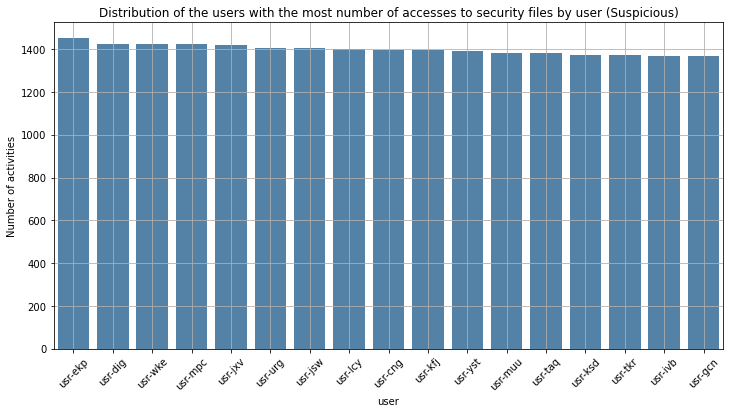

In [29]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=num_access_sys, color = 'steelblue')
plt.title('Distribution of the users with the most number of accesses to security files by user (Suspicious)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [30]:
#Group cleared users by the total access to system files
num_access_sys = file_names[file_names['Label'] == 'Cleared']
num_access_sys = pd.DataFrame(num_access_sys.groupby('user')['Number of activities'].sum())
num_access_sys = num_access_sys.reset_index().sort_values('Number of activities', ascending = False)
num_access_sys

,user,Number of activities
4,usr-eyu,4332
10,usr-psh,4332
17,usr-yqg,4326
15,usr-tvc,4326
2,usr-cro,4307
14,usr-tlv,4295
6,usr-igf,4291
13,usr-tkv,4276
1,usr-bdq,4246
7,usr-lzz,4242


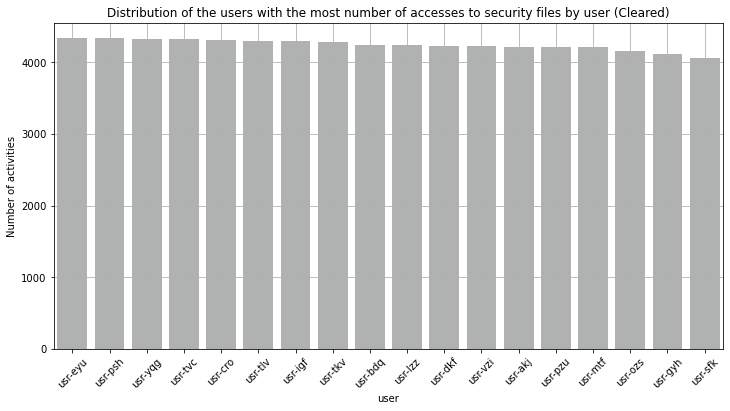

In [31]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=num_access_sys, color = '#B0B2B2')
plt.title('Distribution of the users with the most number of accesses to security files by user (Cleared)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [32]:
usb_insert_num =  pd.DataFrame(usb_data.groupby(['user', 'action'])['action'].count())
usb_insert_num.columns = ['Number of activities']
usb_insert_num = usb_insert_num.reset_index()
#Sort by number of USB entries
usb_insert_num = usb_insert_num.sort_values('Number of activities', ascending = False)
usb_insert_num.head(10)

,user,action,Number of activities
101,usr-tlv,usb_remove,1043
100,usr-tlv,usb_insert,1043
110,usr-vzi,usb_insert,1038
111,usr-vzi,usb_remove,1038
98,usr-tkv,usb_insert,1031
99,usr-tkv,usb_remove,1031
82,usr-ozs,usb_insert,1030
83,usr-ozs,usb_remove,1030
3,usr-akj,usb_remove,1029
2,usr-akj,usb_insert,1029


> Since the number of USB Removals and insertions are approximately the same, we will focus on the number of USB insertions.

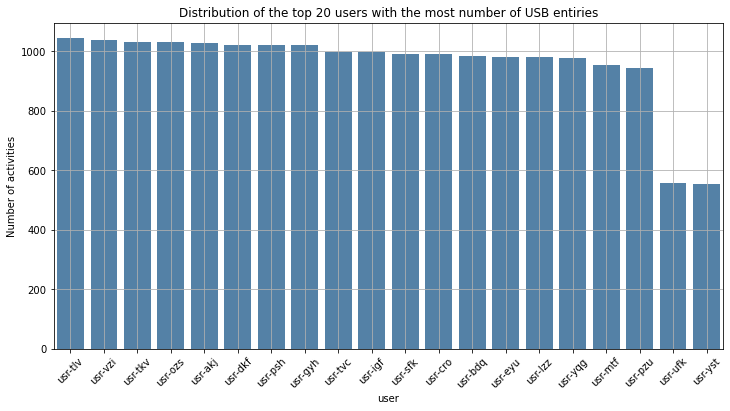

In [33]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=usb_insert_num[usb_insert_num['action']== 'usb_insert'].head(20), color = 'steelblue')
plt.title('Distribution of the top 20 users with the most number of USB entiries')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Web Activities 

> We will examine some of the websites that employees visit that are potentially harmful or are not directly related with work productivity including social media sites, consumer goods sites, news sites, and sites that seem to contain other contents such as moneyt schemes etcetera.

In [46]:
web_data.website.unique()

array(['http://www.bbc.co.uk', 'http://www.mysecurityguard.net',
       'http://www.ebay.co.uk', 'http://www.twitter.com',
       'http://www.google.com', 'http://www.techforum.com',
       'http://www.sky.com', 'http://www.facebook.com',
       'http://www.amazon.co.uk', 'http://www.codeheaven.com',
       'http://www.kalilinux.com', 'http://www.ilovesecurity.com',
       'http://www.securityneeds.com', 'http://www.icancode.com',
       'http://www.l33tcoder.com', 'http://www.wireshark.com',
       'http://www.stackoverflow.com', 'http://www.broadcaster.com',
       'http://www.python.com', 'http://www.helpineedasecurity.net',
       'http://www.humanresourcesystem.com',
       'http://www.cateringcompany.com', 'http://www.humanresources.com',
       'http://www.linkedin.com', 'http://www.financesystem.com',
       'http://www.moneysite.com', 'http://www.findmyguard.co.uk',
       'http://www.legallylaw.com', 'http://www.employeelaw.com',
       'http://www.legaleagle.com', 'http://ww

In [34]:
web_num = pd.DataFrame(web_data.groupby(['user', 'website'])['website'].count())
web_num.columns = ['Number of activities']
web_num = web_num.reset_index()
web_num.head(10)

,user,website,Number of activities
0,usr-abl,http://www.amazon.co.uk,85
1,usr-abl,http://www.bbc.co.uk,90
2,usr-abl,http://www.ebay.co.uk,93
3,usr-abl,http://www.employeelaw.com,90
4,usr-abl,http://www.facebook.com,89
5,usr-abl,http://www.google.com,93
6,usr-abl,http://www.ilovelaw.com,107
7,usr-abl,http://www.legaleagle.com,92
8,usr-abl,http://www.legallylaw.com,90
9,usr-abl,http://www.sky.com,98


> Examine the employees who visit social media sites

In [35]:
list_social = ['http://www.twitter.com', 'http://www.facebook.com', 'http://www.linkedin.com']
web_num_social = web_num[ web_num['website'].isin(list_social) ]
#Find total number of social sites visits
web_num_social = pd.DataFrame(web_num_social.groupby('user')['Number of activities'].sum())
#Sort by number of social media visits
web_num_social = web_num_social.reset_index().sort_values('Number of activities', ascending = False)
web_num_social.head(10)

,user,Number of activities
74,usr-sfk,1588
18,usr-dkf,1564
36,usr-igf,1554
21,usr-eyu,1549
64,usr-ozs,1540
95,usr-yqg,1523
78,usr-tkv,1515
80,usr-tvc,1510
88,usr-vzi,1505
3,usr-akj,1492


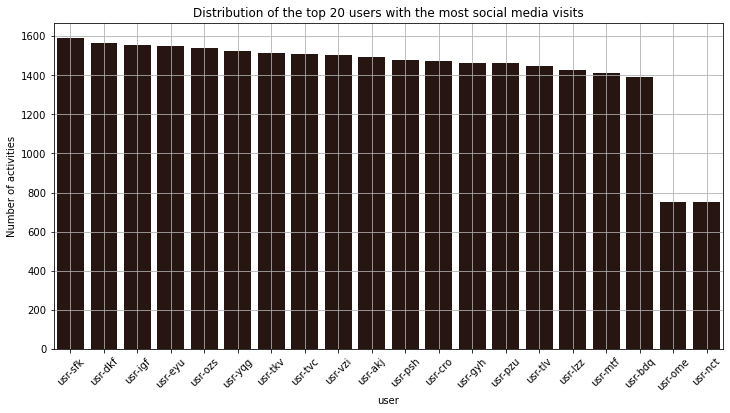

In [36]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=web_num_social.head(20), color = '#2A130E')
plt.title('Distribution of the top 20 users with the most social media visits')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Figure size 864x432 with 0 Axes>

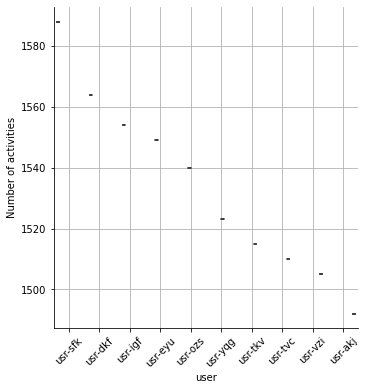

In [37]:
fig = plt.figure(figsize=(12,6))
sns.catplot(data=web_num_social.head(10), kind="box", x="user", y="Number of activities", hue="user")
plt.xticks(rotation=45)
plt.grid()
plt.show();

> Next, we will examine users who visit retailer sites such as amazon and ebay

In [38]:
list_retail = ['http://www.ebay.co.uk', 'http://www.amazon.co.uk']
web_num_retail = web_num[ web_num['website'].isin(list_retail) ]
#Find total number of retail sites visits
web_num_retail = pd.DataFrame(web_num_retail.groupby('user')['Number of activities'].sum())
#Sort by number of retail media visits
web_num_retail = web_num_retail.reset_index().sort_values('Number of activities', ascending = False)
web_num_retail.head(10)

,user,Number of activities
3,usr-akj,1602
51,usr-lzz,1569
36,usr-igf,1564
78,usr-tkv,1563
55,usr-mtf,1536
74,usr-sfk,1515
80,usr-tvc,1508
13,usr-cro,1507
18,usr-dkf,1505
70,usr-pzu,1504


<Figure size 864x432 with 0 Axes>

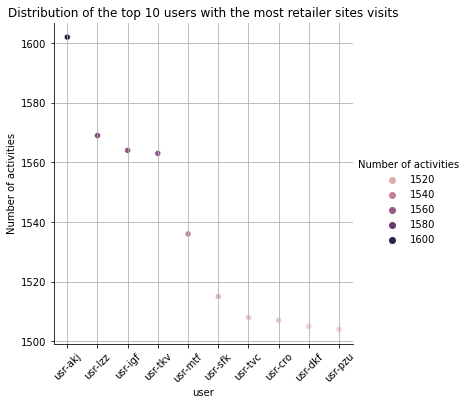

In [39]:
fig = plt.figure(figsize=(12,6))
sns.relplot(x='user', 
            y="Number of activities", 
            data=web_num_retail.head(10),hue="Number of activities", color = '#D3BBB6', )
plt.title('Distribution of the top 10 users with the most retailer sites visits')
plt.xticks(rotation=45)
plt.grid()
plt.show();

> We will also examine users who visit suspicious sites such as 'http://www.moneysite.com' that do not have domain names or have unsecure connections

In [40]:
list_domain = ['http://www.moneysite.com']
web_num_domain = web_num[ web_num['website'].isin(list_domain) ]
#Find total number of domain sites visits
web_num_domain = pd.DataFrame(web_num_domain.groupby('user')['Number of activities'].sum())
#Sort by number of domain media visits
web_num_domain = web_num_domain.reset_index().sort_values('Number of activities', ascending = False)
web_num_domain.head(10)

,user,Number of activities
16,usr-ngp,252
18,usr-ome,252
10,usr-hno,244
1,usr-auj,243
27,usr-zjm,242
3,usr-bbx,242
15,usr-nct,240
13,usr-iuv,238
22,usr-uuo,235
12,usr-ity,233


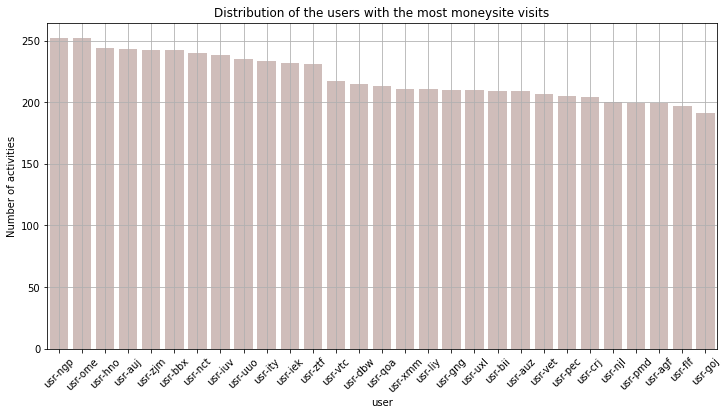

In [41]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=web_num_domain, color = '#D3BBB6')
plt.title('Distribution of the users with the most moneysite visits')
plt.xticks(rotation=45)
plt.grid()
plt.show()

> Other malicious activities might include visiting news sites using company resources. Such sites include BBC, SKY

In [42]:
list_news = ['http://www.sky.com', 'http://www.bbc.co.uk']
web_num_news = web_num[ web_num['website'].isin(list_news) ]
#Find total number of news sites visits
web_num_news = pd.DataFrame(web_num_news.groupby('user')['Number of activities'].sum())
#Sort by number of news media visits
web_num_news = web_num_news.reset_index().sort_values('Number of activities', ascending = False)
web_num_news.head(10)

,user,Number of activities
3,usr-akj,1574
64,usr-ozs,1555
36,usr-igf,1544
80,usr-tvc,1516
28,usr-gyh,1515
13,usr-cro,1514
78,usr-tkv,1514
74,usr-sfk,1509
18,usr-dkf,1498
70,usr-pzu,1488


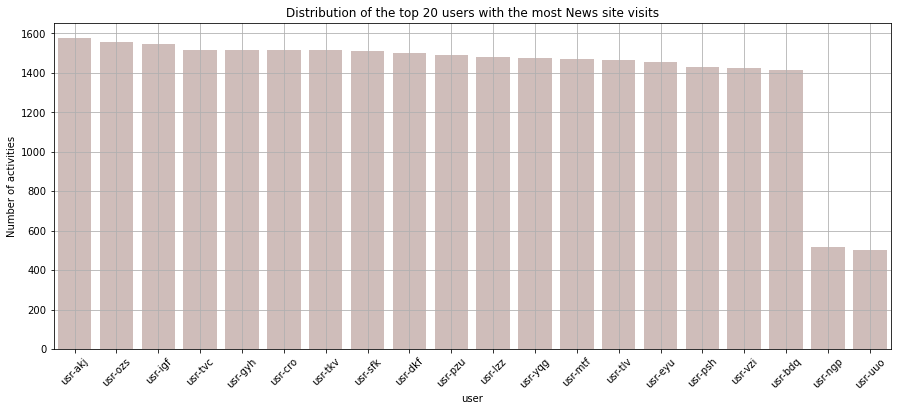

In [43]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=web_num_news.head(20), color = '#D3BBB6')
plt.title('Distribution of the top 20 users with the most News site visits')
plt.xticks(rotation=45)
plt.grid()
plt.show()

> Examine users who visit sites that are offer services not related to the company or helping work activities such as 'http://www.cateringcompany.com'

In [44]:
list_cater = ['http://www.cateringcompany.com']
web_num_cater = web_num[ web_num['website'].isin(list_cater) ]
#Find total number of cater sites visits
web_num_cater = pd.DataFrame(web_num_cater.groupby('user')['Number of activities'].sum())
#Sort by number of cater media visits
web_num_cater = web_num_cater.reset_index().sort_values('Number of activities', ascending = False)
web_num_cater.head(10)

,user,Number of activities
9,usr-iek,232
27,usr-vtc,230
1,usr-auj,218
10,usr-ity,218
3,usr-crj,215
20,usr-pmd,210
7,usr-gng,208
0,usr-agf,207
19,usr-pec,205
25,usr-uxl,201


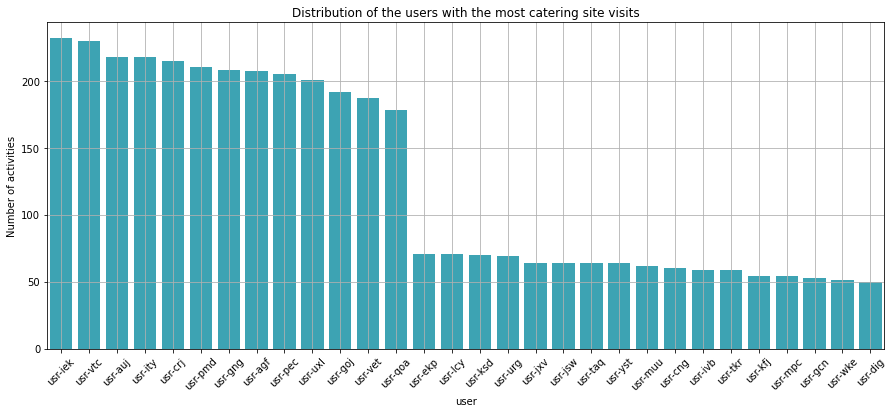

In [45]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='user', 
            y="Number of activities", 
            data=web_num_cater, color = '#29B1C7')
plt.title('Distribution of the users with the most catering site visits')
plt.xticks(rotation=45)
plt.grid()
plt.show()

> As noted from the preceding visualizations, some of the users such as 'usr-tkv',
 'usr-igf',
 'usr-bdq',
 'usr-dkf',
 'usr-lzz',
 'usr-mtf',
 'usr-eyu',
 'usr-psh',
 'usr-sfk',
 'usr-yqg',
 'usr-tvc',
 'usr-akj',
 'usr-pzu',
 'usr-ozs',
 'usr-gyh',
 'usr-cro',
 'usr-vzi',
 'usr-tlv' attempted to access security ID files which are generally sensitive information that they do not have authorization to while users such as
 'usr-ngp',
 'usr-ome',
 'usr-hno',
 'usr-auj',
 'usr-zjm',
 'usr-bbx',
 'usr-nct',
 'usr-iuv',
 'usr-uuo',
 'usr-ity',
 'usr-iek',
 'usr-ztf',
 'usr-vtc',
 'usr-dbw',
 'usr-qoa',
 'usr-xmm',
 'usr-liy',
 'usr-gng',
 'usr-uxl',
 'usr-bii',
 'usr-auz',
 'usr-vet',
 'usr-pec',
 'usr-crj',
 'usr-njl',
 'usr-pmd',
 'usr-agf',
 'usr-flf',
 'usr-goj' visited unsecure sites such as http://www.moneysite.com an indication of malicious activities that places the company at risk of attacks. Other malicious activities as noted above include excessive visiting of social media sites, news sites, retailer sites, and catering sites (http://www.cateringcompany.com) using official resources as observed for some users such as:
 'usr-iek',
 'usr-vtc',
 'usr-auj',
 'usr-ity',
 'usr-crj',
 'usr-pmd',
 'usr-gng',
 'usr-agf',
 'usr-pec',
 'usr-uxl',
 'usr-goj',
 'usr-vet',
 'usr-qoa',
 'usr-ekp',
 'usr-lcy',
 'usr-ksd',
 'usr-urg',
 'usr-jxv',
 'usr-jsw',
 'usr-taq',
 'usr-yst',
 'usr-muu',
 'usr-cng',
 'usr-ivb',
 'usr-tkr',
 'usr-kfj',
 'usr-mpc',
 'usr-gcn',
 'usr-wke', and,
 'usr-dig'. It is important to note that http://www.cateringcompany.com is not a real site and besides it does not offer a secure connection